# Senitiment Analysis for Dockless Bikes
#### The search query is generated after inputing the query word, language & period in the advanced search option from Twitter. This criteria will now be visible in the search bar, which is copied and pasted in the code as 'query'.

In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define the Twitter search query.
query = 'dockless bike london lang:en until:2023-02-01 since:2018-01-01'

In [3]:
# Define a list to store the cleaned tweets.
cleaned_tweets = []

In [4]:
# Define the maximum number of tweets to retrieve.
limit = 100000

In [5]:
# Retrieve the tweets.
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    # Break the loop if the maximum number of tweets has been reached.
    if len(cleaned_tweets) == limit:
        break
    else:
        # Clean the text of the tweet.
        cleaned_tweet = re.sub(r'http\S+', '', tweet.rawContent) # remove URLs
        cleaned_tweet = re.sub(r'@[A-Za-z0-9]+', '', cleaned_tweet) # remove mentions
        cleaned_tweet = re.sub(r'#', '', cleaned_tweet) # remove hashtags
        cleaned_tweet = re.sub(r'[^\w\s]', '', cleaned_tweet) # remove special characters
       
    # Append the cleaned tweet to the list of cleaned tweets.
    cleaned_tweets.append(cleaned_tweet)

In [6]:
# Create a Pandas dataframe from the list of cleaned tweets.
df = pd.DataFrame({'Tweet': cleaned_tweets})

In [7]:
# Creating a copy of the dataframe
df_copy = df.copy()

In [8]:
# Select the 'Tweet' column of the dataframe.
df1 = df['Tweet'].values

In [9]:
# To view the entire reivew and summary column.
pd.set_option('display.max_colwidth', None)

In [10]:
# Print the results.
df1

array(['Limebike rules for parking  responsible parking is a really important part of making sure our service works\n\nMandatory  parking in dockless bays\n\nCamden\nCity of London\nHackney\nEaling\nHammersmith amp Fulham\n\nElsewhere Nearest bike rack or neatly on pavement side ',
       'Pretty wild that you can abandon a car on a single yellow line in the dead center of London for MONTHS and nobody bats an eye until  notices \n\nJust turn that into dockless bike parking  clearly that space wasnt needed for other purposes cc ',
       '  Would love to see it happen in Belfast Having used dockless EBike amp EScooter schemes in Copenhagen and London the convenience of being able to leave the bike in geomarked zonesbays is just amazing  come to Belfast please',
       ' _behan We were on BBC London last night about this The dockless bike scheme need to pause and docking stations where the bikes are locked into position off the pavement need to be installed Their buisness model simply do

## Using SentimentIntensityAnalyzer

In [11]:
# Import the vader classs and create a object of the analyzer called Darth Vader.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
sia = SentimentIntensityAnalyzer()

In [12]:
# Define a function to apply the analyzer to each row
def get_sentiment_score(Tweet):
    scores = sia.polarity_scores(Tweet)
    return scores['compound']

In [13]:
# Apply the function to the DataFrame column
df_copy['sentiment_score'] = df_copy['Tweet'].apply(lambda x: get_sentiment_score(x))

In [14]:
# View the results
df_copy.head()

,Tweet,sentiment_score
0,Limebike rules for parking responsible parking is a really important part of making sure our service works\n\nMandatory parking in dockless bays\n\nCamden\nCity of London\nHackney\nEaling\nHammersmith amp Fulham\n\nElsewhere Nearest bike rack or neatly on pavement side,0.8122
1,Pretty wild that you can abandon a car on a single yellow line in the dead center of London for MONTHS and nobody bats an eye until notices \n\nJust turn that into dockless bike parking clearly that space wasnt needed for other purposes cc,-0.3182
2,Would love to see it happen in Belfast Having used dockless EBike amp EScooter schemes in Copenhagen and London the convenience of being able to leave the bike in geomarked zonesbays is just amazing come to Belfast please,0.8779
3,_behan We were on BBC London last night about this The dockless bike scheme need to pause and docking stations where the bikes are locked into position off the pavement need to be installed Their buisness model simply does not work,0.0000
4,Its been patently obvious since the beginning that dockless hire bikes do not work Just expand the London bike system inc E bikes,-0.2411


In [15]:
# Get the top 10 positive tweets
df_copy.sort_values('sentiment_score', ascending=0).head(10)

,Tweet,sentiment_score
390,The OLSGEIRE St Patricks Annual Bike Ride on Saturday Im riding great new dockless bike over 55km 3 gears solid tyres just to make it more interesting Please support North London Hospice at,0.9222
71,Cyclings a great way to explore London With bike sharing schemes getting more popular Ive seen a huge increase in abandoned bikes on pavements \n\nIf you use a dockless bike please dont leave it strewn across the pavements its a hazard for _Uk amp me\n,0.9192
216,Somehow Ive been charged enough to become a small investor in your bike sharing company Im happy to send the 115 by check if you can provide my shareholder paperwork and some swag to celebrate our shared vision of dockless bikes dockless mobike london,0.9153
190,Lasers are great and all but the facts that it has been created by a talented woman working in design and has no association with Boris the berk are the things Im cheering for Berylbikes\n\nLondons getting another dockless bike but this one has lasers,0.9032
147,Smart dockless electric bike sharing arrives in the City of London download now for 5 FREE credit,0.9029
111,Good _cycling are getting involved as they can excert influence amp pressure on local councils to improve cycling infrastructure encourage them to allow dockless bike trials amp encourage them to be run responsibly,0.9022
34,Really proud to lead the trial from a perspective but as a borough given all our other active travel work we didnt have the resources to join the London escooter trial esp as we were focused on the new dockless bike scheme we have just announced 12 GrillPhil,0.8989
62,Fantastic Note the high number of Need to extend this Londonwide amp in interim use public funds if needed to support Londonwide dockless bike hire to assist with freeing up public transport amp keeping car use at a minimum,0.8860
63,Fantastic Note the high number of Need to extend this Londonwide amp in interim use public funds if needed to support Londonwide dockless bike hire to assist with freeing up public transport amp keeping car use at a minimum,0.8860
2,Would love to see it happen in Belfast Having used dockless EBike amp EScooter schemes in Copenhagen and London the convenience of being able to leave the bike in geomarked zonesbays is just amazing come to Belfast please,0.8779


In [16]:
# Get the top 10 most negative
df_copy.sort_values('sentiment_score', ascending=1).head(10)

,Tweet,sentiment_score
127,Perhaps the type of people who use dockless escooter schemes also use dockless bike schemes particularly since some of the biggest operators offer both\n\nThe UK and London in particular are simply behind the rest of the world in continuing to take this ban ban ban approach,-0.9294
79,The point is that my mobility as a visually impaired pedestrian could be severely impacted\n\nThe dockless bike problem in London now means I have to take a bus instead of a ten minute walk to get to work because so many are left abandoned on pavements I kept hurting myself,-0.8860
177,Real shame that TfL dont run their own dockless bike scheme which covers London with electric bikes that can be charged in modified docks Instead they leave gaps to be filled by failed private ventures Cf CityMapper doing its own transport,-0.8126
266,Doubt it As far as I can see these dockless bike hire companies are pulling out of cities where cycling is particularly shit You have to wonder if Londons system would survive if it had to entirely pay its own way,-0.7956
367,They were actually talking about replacing Bixi in Montreal same as the current London bike share with a dockless system The city basically went OH HELL NO for exactly this reason,-0.7944
269,Just tried and failed to find a single working _bicycleUK hunted down FIVE bikes and they were either broken from people trying to steal tyres or hidden in someones home this is a clear indication of why this dockless bike scheme does not work in London,-0.7906
120,Its bad enough that individuals carelessly leave dockless bikes on pavements causing problems for people like Dr Kavanavgh But the bike companies themselves place bikes in such inconsiderate places This is right outside a major London hospital today,-0.7783
389,OBike already had to remove their bikes from London after many complaints about broken and vandalized bikes were abandoned across the city Melbourne Australia is experiencing the same as many cities are as unregulated dockless bike operators appear Whats the solution,-0.7579
5,Finally London councils coming to its senses over these dangerous dockless bikes First Westminster said any Line bike found dangerously parked will be removedand now Haringey dont want them to start or finish in their Borough,-0.7447
97,Dockless bikes on pavements cause dangerous obstructions particularly for Blind or VI people If you come across a dockless bike causing an obstruction anywhere in London take a photo and tag and _campaigns on twitter\nInclusiveJourneys Accessibility,-0.7251


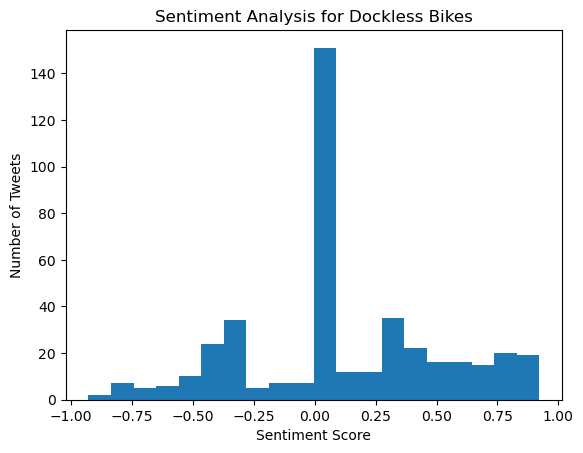

In [17]:
plt.hist(df_copy['sentiment_score'], bins=20)
plt.title('Sentiment Analysis for Dockless Bikes')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')

# Save plot
plt.savefig('dckls.png')

plt.show()

In [18]:
# Count the number of positive, negative, and neutral tweets
pos_count1 = df_copy[df_copy['sentiment_score'] > 0]['sentiment_score'].count()
neg_count1 = df_copy[df_copy['sentiment_score'] < 0]['sentiment_score'].count()
neu_count1 = df_copy[df_copy['sentiment_score'] == 0]['sentiment_score'].count()

# Calculate the percentage of positive, negative, and neutral tweets
pos_perc1 = (pos_count1 / len(df_copy)) * 100
neg_perc1 = (neg_count1 / len(df_copy)) * 100
neu_perc1 = (neu_count1 / len(df_copy)) * 100

# Print the percentages
print(f"Positive tweets: {pos_perc1:.2f}%")
print(f"Negative tweets: {neg_perc1:.2f}%")
print(f"Neutral tweets: {neu_perc1:.2f}%")

Positive tweets: 44.71%
Negative tweets: 25.18%
Neutral tweets: 30.12%


#### Tokenise and create wordclouds

In [19]:
# Import all the necessary packages.
import nltk 

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

import seaborn as sns

# Import Counter.
from collections import Counter

In [20]:
# Creating a copy of the dataframe
df2 = df_copy.copy()

In [21]:
df2.head()

,Tweet,sentiment_score
0,Limebike rules for parking responsible parking is a really important part of making sure our service works\n\nMandatory parking in dockless bays\n\nCamden\nCity of London\nHackney\nEaling\nHammersmith amp Fulham\n\nElsewhere Nearest bike rack or neatly on pavement side,0.8122
1,Pretty wild that you can abandon a car on a single yellow line in the dead center of London for MONTHS and nobody bats an eye until notices \n\nJust turn that into dockless bike parking clearly that space wasnt needed for other purposes cc,-0.3182
2,Would love to see it happen in Belfast Having used dockless EBike amp EScooter schemes in Copenhagen and London the convenience of being able to leave the bike in geomarked zonesbays is just amazing come to Belfast please,0.8779
3,_behan We were on BBC London last night about this The dockless bike scheme need to pause and docking stations where the bikes are locked into position off the pavement need to be installed Their buisness model simply does not work,0.0000
4,Its been patently obvious since the beginning that dockless hire bikes do not work Just expand the London bike system inc E bikes,-0.2411


In [22]:
# Apply tokenization to Tweet column
df2['Tweet'] = df2['Tweet'].apply(word_tokenize)

In [23]:
# Combine all tokens from all tweets into a single list
all_tokens2 = [token for tweet in df2['Tweet'] for token in tweet]

In [24]:
# Remove non-alphabetic tokens and convert to lowercase
filtered_tokens2 = [token.lower() for token in all_tokens2 if token.isalpha()]

In [25]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens2 = [token for token in filtered_tokens2 if token not in stop_words]

In [26]:
# Create frequency distribution
fdist_n = FreqDist(filtered_tokens2)

In [27]:
# Display the 30 most common tokens and their frequencies
print(fdist_n.most_common(30))

[('dockless', 460), ('bike', 427), ('london', 357), ('bikes', 96), ('hire', 87), ('londons', 71), ('scheme', 65), ('amp', 62), ('electric', 53), ('schemes', 48), ('new', 47), ('ofo', 47), ('one', 45), ('borough', 38), ('make', 35), ('like', 31), ('getting', 31), ('companies', 30), ('share', 30), ('citymapper', 28), ('parking', 27), ('another', 27), ('city', 26), ('sense', 26), ('get', 26), ('trying', 26), ('across', 25), ('londonwide', 25), ('boroughs', 24), ('good', 22)]


In [28]:
# Create wordcloud
wordcloud = WordCloud(width=1600, height=900,
                      background_color='white',
                      colormap='plasma',
                      min_font_size=10).generate(' '.join(filtered_tokens2))

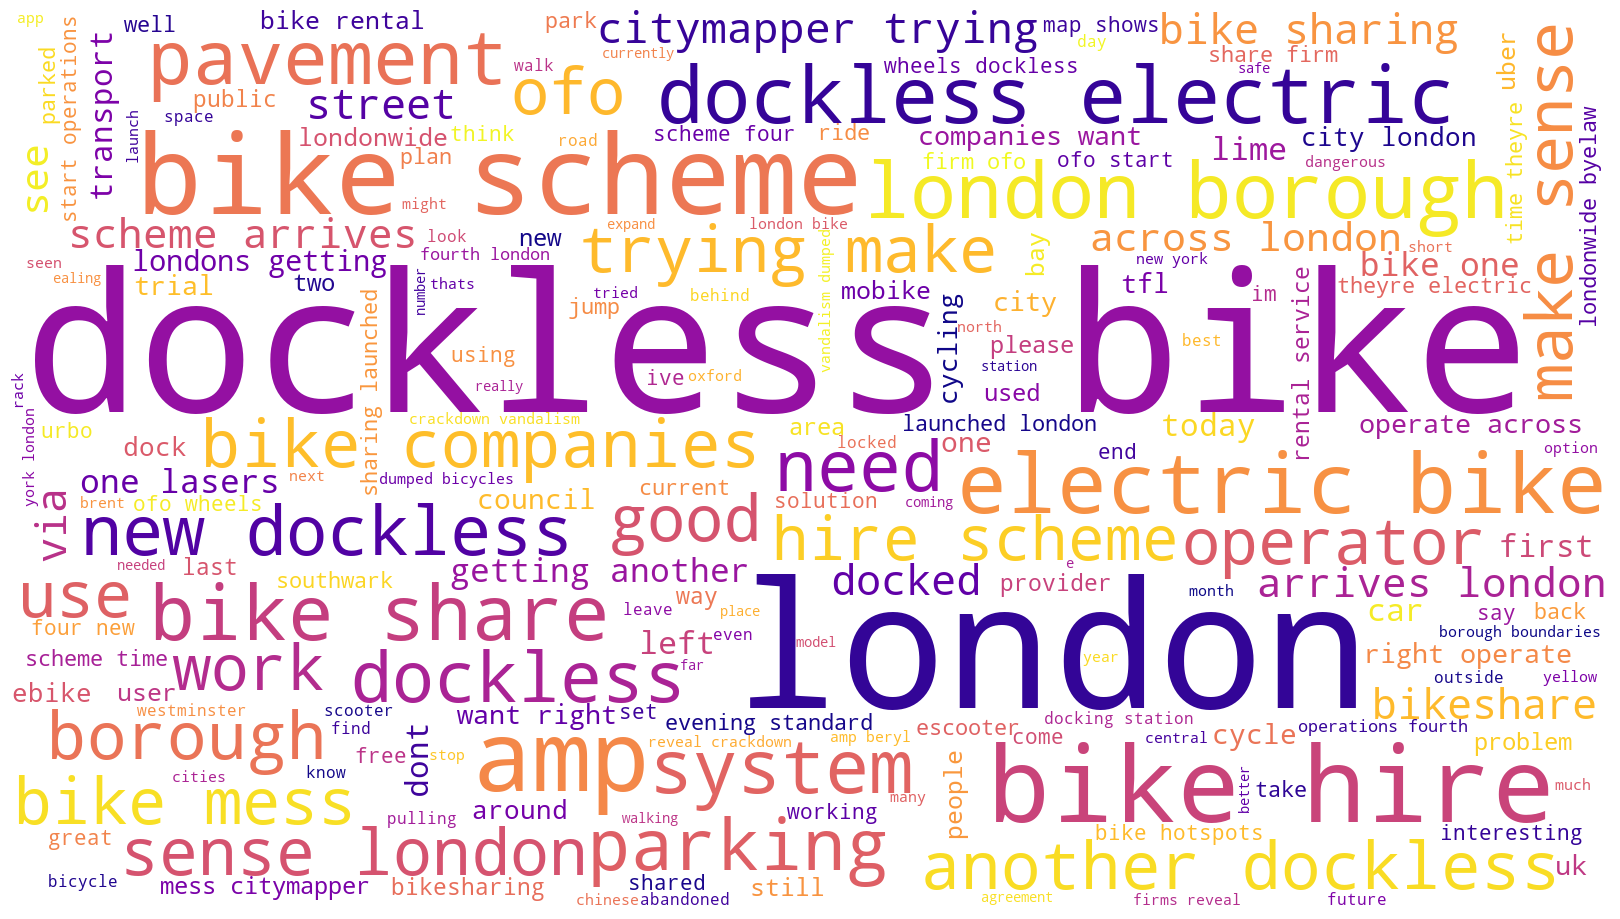

In [29]:
# Display the wordcloud
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('cloud_dock')
plt.show()

In [44]:
# Generate a DataFrame from Counter.
counts2 = pd.DataFrame(Counter(filtered_tokens2).most_common(20),
                          columns=['Word', 'Frequency'])

In [45]:
# Preview data.
counts2

,Word,Frequency
0,dockless,460
1,bike,427
2,london,357
3,bikes,96
4,hire,87
5,londons,71
6,scheme,65
7,amp,62
8,electric,53
9,schemes,48


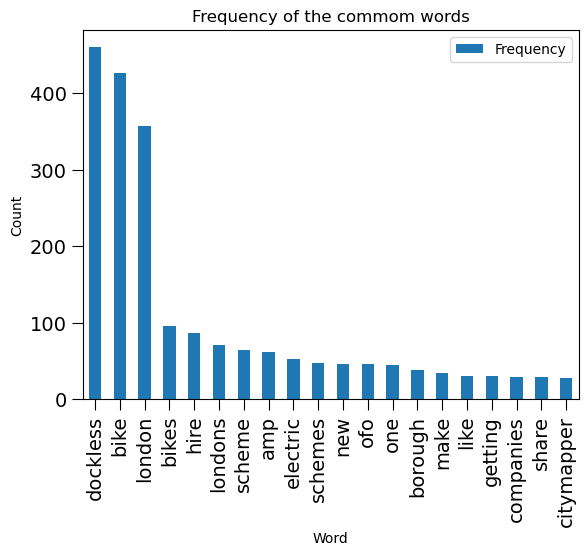

In [46]:
# Create the bar chart
counts2.plot(x='Word', y='Frequency', kind='bar')

# Add a title and labels
plt.title('Frequency of the commom words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.tick_params(axis='both', which='major', labelsize=14, length=8)
plt.savefig('freq_dock_word')
# Show the plot
plt.show()

In [33]:
from textblob import TextBlob

# Define a function to extract a polartiy score.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [34]:
# Populate a new column with polarity scores for 15 most frequent words used in review.
counts2['polarity'] = counts2['Word'].apply(generate_polarity)

In [35]:
#converting the list of strings in the 'Tweet' column to a single string 
df2['Tweet'] = df2['Tweet'].apply(' '.join)

In [36]:
# Define a function to extract a subjectivity score.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [37]:
# Populate a new column with subjectivity scores for each tweet.
df2['subjectivity'] = df2['Tweet'].apply(generate_subjectivity)

In [38]:
# Populate a new column with polarity scores for each tweet.
df2['polarity'] = df2['Tweet'].apply(generate_polarity)

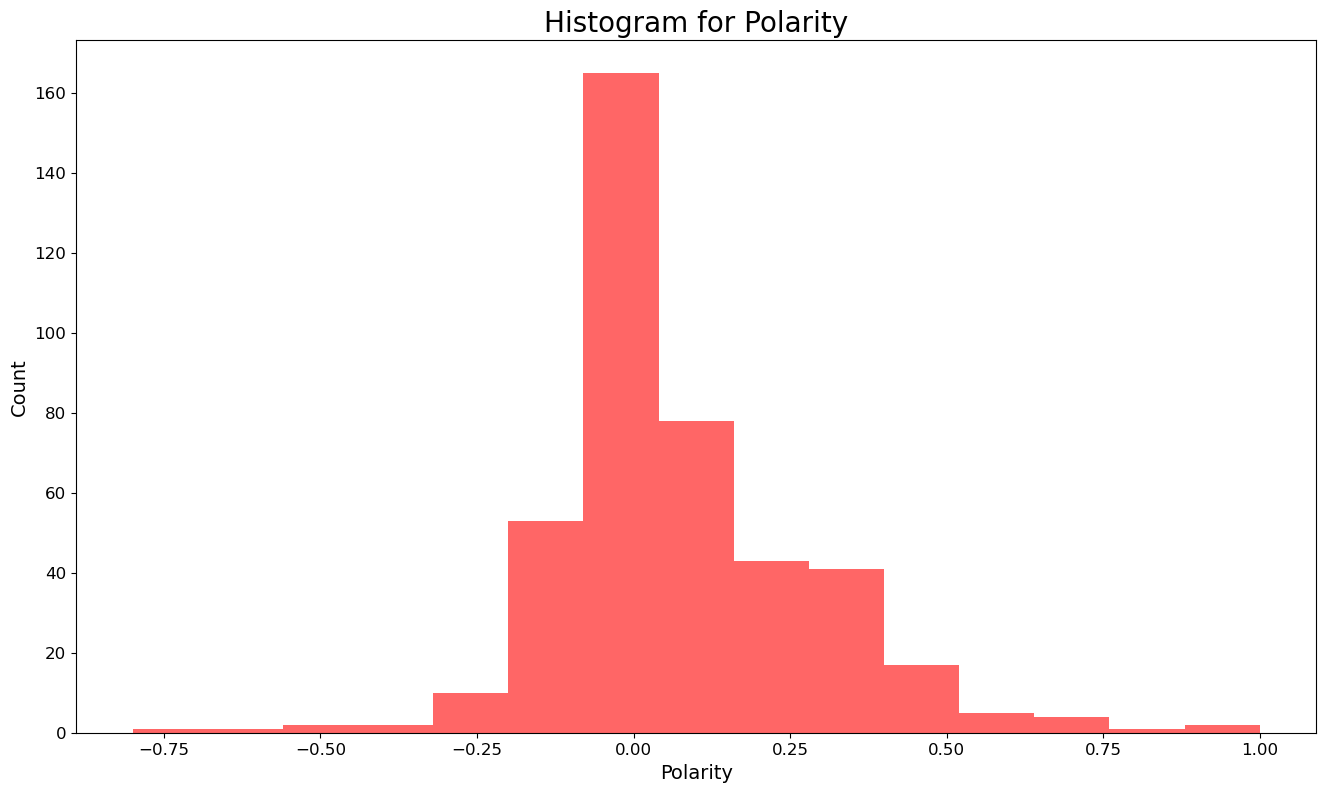

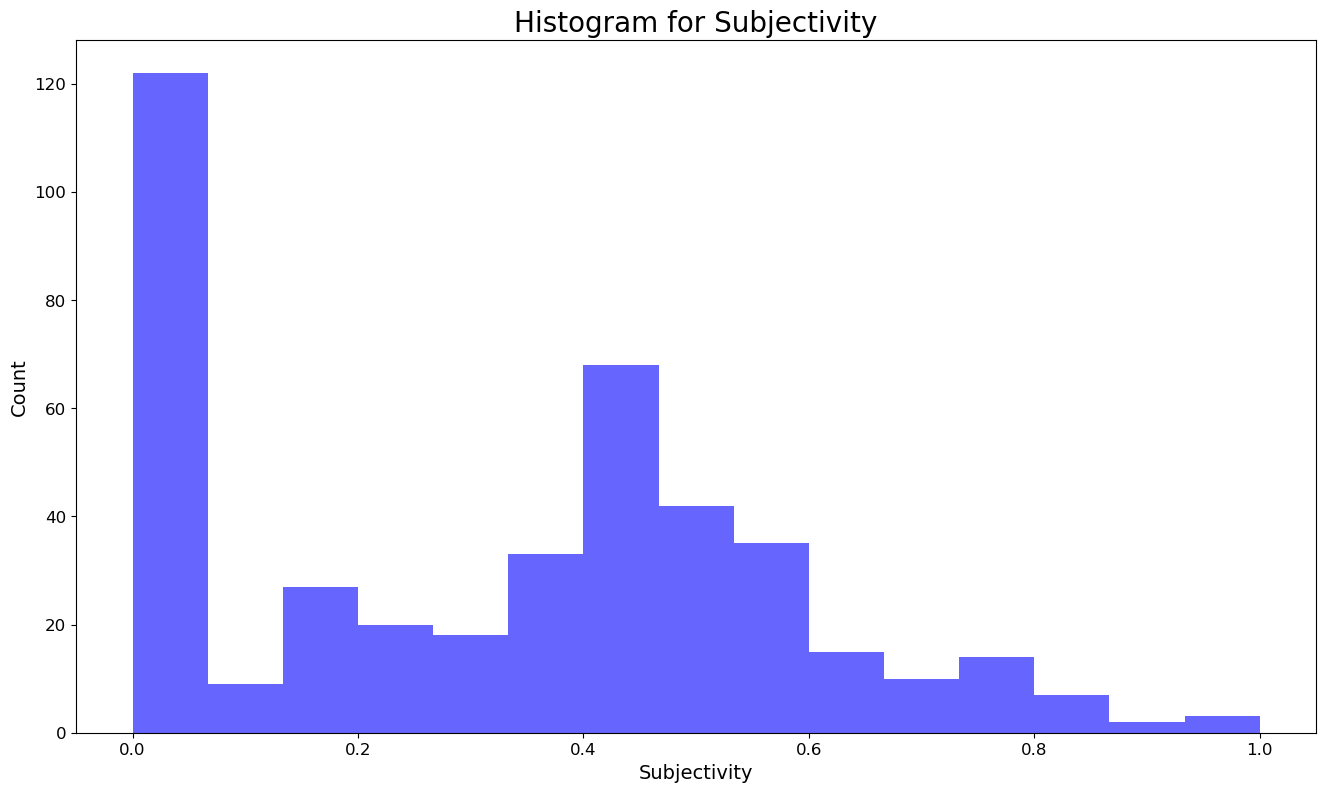

In [48]:
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df2['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Histogram for Polarity', fontsize=20)
plt.savefig('hist_dock_bike_pol')
# Histogram of subjectivity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df2['subjectivity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Histogram for Subjectivity', fontsize=20)
plt.savefig('hist_dock_bike_sub')
plt.show()

In [40]:
df2.head()

,Tweet,sentiment_score,subjectivity,polarity
0,Limebike rules for parking responsible parking is a really important part of making sure our service works Mandatory parking in dockless bays Camden City of London Hackney Ealing Hammersmith amp Fulham Elsewhere Nearest bike rack or neatly on pavement side,0.8122,0.812963,0.366667
1,Pretty wild that you can abandon a car on a single yellow line in the dead center of London for MONTHS and nobody bats an eye until notices Just turn that into dockless bike parking clearly that space wasnt needed for other purposes cc,-0.3182,0.359077,-0.005804
2,Would love to see it happen in Belfast Having used dockless EBike amp EScooter schemes in Copenhagen and London the convenience of being able to leave the bike in geomarked zonesbays is just amazing come to Belfast please,0.8779,0.708333,0.533333
3,_behan We were on BBC London last night about this The dockless bike scheme need to pause and docking stations where the bikes are locked into position off the pavement need to be installed Their buisness model simply does not work,0.0000,0.211905,0.000000
4,Its been patently obvious since the beginning that dockless hire bikes do not work Just expand the London bike system inc E bikes,-0.2411,0.500000,0.000000


In [41]:
# Sort the DataFrame by the 'subjectivity' column in ascending order
df6 = df2.sort_values(by='sentiment_score', ascending=True)

In [42]:
# Select the top negative reviews
top_neg_reviews2 = df6.head(15)

In [43]:
#View the top -ve reviews.
top_neg_reviews2[['Tweet', 'sentiment_score','subjectivity','polarity']].reset_index()

,index,Tweet,sentiment_score,subjectivity,polarity
0,127,Perhaps the type of people who use dockless escooter schemes also use dockless bike schemes particularly since some of the biggest operators offer both The UK and London in particular are simply behind the rest of the world in continuing to take this ban ban ban approach,-0.9294,0.455556,-0.022222
1,79,The point is that my mobility as a visually impaired pedestrian could be severely impacted The dockless bike problem in London now means I have to take a bus instead of a ten minute walk to get to work because so many are left abandoned on pavements I kept hurting myself,-0.8860,0.125000,0.125000
2,177,Real shame that TfL dont run their own dockless bike scheme which covers London with electric bikes that can be charged in modified docks Instead they leave gaps to be filled by failed private ventures Cf CityMapper doing its own transport,-0.8126,0.645833,0.216667
3,266,Doubt it As far as I can see these dockless bike hire companies are pulling out of cities where cycling is particularly shit You have to wonder if Londons system would survive if it had to entirely pay its own way,-0.7956,0.856250,0.125000
4,367,They were actually talking about replacing Bixi in Montreal same as the current London bike share with a dockless system The city basically went OH HELL NO for exactly this reason,-0.7944,0.218750,0.062500
5,269,Just tried and failed to find a single working _bicycleUK hunted down FIVE bikes and they were either broken from people trying to steal tyres or hidden in someones home this is a clear indication of why this dockless bike scheme does not work in London,-0.7906,0.319974,-0.198942
6,120,Its bad enough that individuals carelessly leave dockless bikes on pavements causing problems for people like Dr Kavanavgh But the bike companies themselves place bikes in such inconsiderate places This is right outside a major London hospital today,-0.7783,0.521769,-0.121684
7,389,OBike already had to remove their bikes from London after many complaints about broken and vandalized bikes were abandoned across the city Melbourne Australia is experiencing the same as many cities are as unregulated dockless bike operators appear Whats the solution,-0.7579,0.381250,0.150000
8,5,Finally London councils coming to its senses over these dangerous dockless bikes First Westminster said any Line bike found dangerously parked will be removedand now Haringey dont want them to start or finish in their Borough,-0.7447,0.783333,-0.237500
9,97,Dockless bikes on pavements cause dangerous obstructions particularly for Blind or VI people If you come across a dockless bike causing an obstruction anywhere in London take a photo and tag and _campaigns on twitter InclusiveJourneys Accessibility,-0.7251,0.633333,-0.311111
